<a href="https://colab.research.google.com/github/wawa6609/googlecolab/blob/master/my_Roboflow_Custom_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies

In [2]:
!git clone https://github.com/roboflow-ai/yolov5  # clone repo, forked via https://github.com/ultralytics/yolov5
!pip install -U -r yolov5/requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 313 (delta 2), reused 6 (delta 2), pack-reused 307
Receiving objects: 100% (313/313), 3.03 MiB | 21.53 MiB/s, done.
Resolving deltas: 100% (197/197), done.
     |████████████████████████████████| 20.4MB 55.2MB/s 
     |████████████████████████████████| 28.2MB 78kB/s 
     |████████████████████████████████| 753.2MB 20kB/s 
     |████████████████████████████████| 12.4MB 238kB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 2.1MB 38.0MB/s 
Requirement already up-to-date: tensorboard in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 9)) (2.2.2)
     |████████████████████████████████| 276kB 37.3MB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0.1-cp36-cp36m-linux_x86_64.whl size=267029 sha256=e71d6609691157408eaaa50ee9667df30565a92307

In [ ]:
# change directory to our newly cloned YOLOv5 folder
%cd /content/yolov5

/content/yolov5


In [ ]:
# import requirements
import torch
from IPython.display import Image  # for displaying images
from utils.google_utils import gdrive_download  # for downloading models/datasets

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


# Download Correctly Formatted Custom Dataset 

In [ ]:
# Export code snippet and paste here
%cd /content
!curl -L "LINK" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1188      0 --:--:-- --:--:-- --:--:--  1186
100 8091k  100 8091k    0     0  5079k      0  0:00:01  0:00:01 --:--:-- 5079k
Archive:  roboflow.zip
 extracting: test/images/c9_jpg.rf.a3e2a259d1d3fd7acb4f3bde4af8fced.jpg  
 extracting: test/images/b29_jpg.rf.ed5dc5399d75018ee25fd49ccd5539ff.jpg  
 extracting: test/images/h20_jpg.rf.4d889289782a7eca9bb3fba26bf56c9a.jpg  
 extracting: test/images/g55_jpg.rf.c0be5d1b58f92bb6748dfb313ab8332d.jpg  
 extracting: test/images/g51_jpg.rf.87faa7f29dc7fbde08035166f639f432.jpg  
 extracting: train/images/e40_jpg.rf.02a90f15159505730f235cca1620ba66.jpg  
 extracting: train/images/g20_jpg.rf.02af2b206d9b865be17a13c096a31ecc.jpg  
 extracting: test/images/b16_jpg.rf.87dce99596eb60e1c1e6a8b990908010.jpg  
 extracting: train/images/h23_jpg.rf.00aea079dc16b7

In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['1zl']

# Define Model Configuration and Architecture

In [ ]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
%cd /content/
##write custom model .yaml
#you can configure this based on other YOLOv5 models in the models directory
with open('yolov5/models/custom_yolov5s.yaml', 'w') as f:
  # parameters
  f.write('nc: ' + num_classes + '\n')
  #f.write('nc: ' + str(len(class_labels)) + '\n')
  f.write('depth_multiple: 0.33'  + '\n') # model depth multiple
  f.write('width_multiple: 0.50'  + '\n')  # layer channel multiple
  f.write('\n')
  f.write('anchors:' + '\n')
  f.write('  - [10,13, 16,30, 33,23] ' + '\n')
  f.write('  - [30,61, 62,45, 59,119]' + '\n')
  f.write('  - [116,90, 156,198, 373,326] ' + '\n')
  f.write('\n')

  f.write('backbone:' + '\n')
  f.write('  [[-1, 1, Focus, [64, 3]],' + '\n')
  f.write('   [-1, 1, Conv, [128, 3, 2]],' + '\n')
  f.write('   [-1, 3, Bottleneck, [128]],' + '\n')
  f.write('   [-1, 1, Conv, [256, 3, 2]],' + '\n')
  f.write('   [-1, 9, BottleneckCSP, [256]],' + '\n')
  f.write('   [-1, 1, Conv, [512, 3, 2]], ' + '\n')
  f.write('   [-1, 9, BottleneckCSP, [512]],' + '\n')
  f.write('   [-1, 1, Conv, [1024, 3, 2]],' + '\n')
  f.write('   [-1, 1, SPP, [1024, [5, 9, 13]]],' + '\n')
  f.write('   [-1, 6, BottleneckCSP, [1024]],' + '\n')
  f.write('  ]' + '\n')
  f.write('\n')

  f.write('head:'  + '\n')
  f.write('  [[-1, 3, BottleneckCSP, [1024, False]],'  + '\n')
  f.write('   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1, 0]],' + '\n')
  f.write('   [-2, 1, nn.Upsample, [None, 2, "nearest"]],' + '\n')
  
  f.write('   [[-1, 6], 1, Concat, [1]],' + '\n')
  f.write('   [-1, 1, Conv, [512, 1, 1]],' + '\n')
  f.write('   [-1, 3, BottleneckCSP, [512, False]],' + '\n')
  f.write('   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1, 0]],' + '\n')
  
  f.write('   [-2, 1, nn.Upsample, [None, 2, "nearest"]],' + '\n')
  f.write('   [[-1, 4], 1, Concat, [1]],' + '\n')
  f.write('   [-1, 1, Conv, [256, 1, 1]],' + '\n')
  f.write('   [-1, 3, BottleneckCSP, [256, False]],' + '\n')
  f.write('   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1, 0]],' + '\n')
  f.write('\n' )
  f.write('   [[], 1, Detect, [nc, anchors]],' + '\n')
  f.write('  ]' + '\n')

print('custom model config written!')

/content
custom model config written!


# Train Custom YOLOv5 Detector



Arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs.
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights.
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results --nosave --cache

/content/yolov5
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='././models/custom_yolov5s.yaml', data='./../data.yaml', device='', epochs=100, evolve=False, img_size=[416], multi_scale=False, name='yolov5s_results', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-06-17 17:49:58.809772: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/



# Evaluate Custom YOLOv5 Detector Performance

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

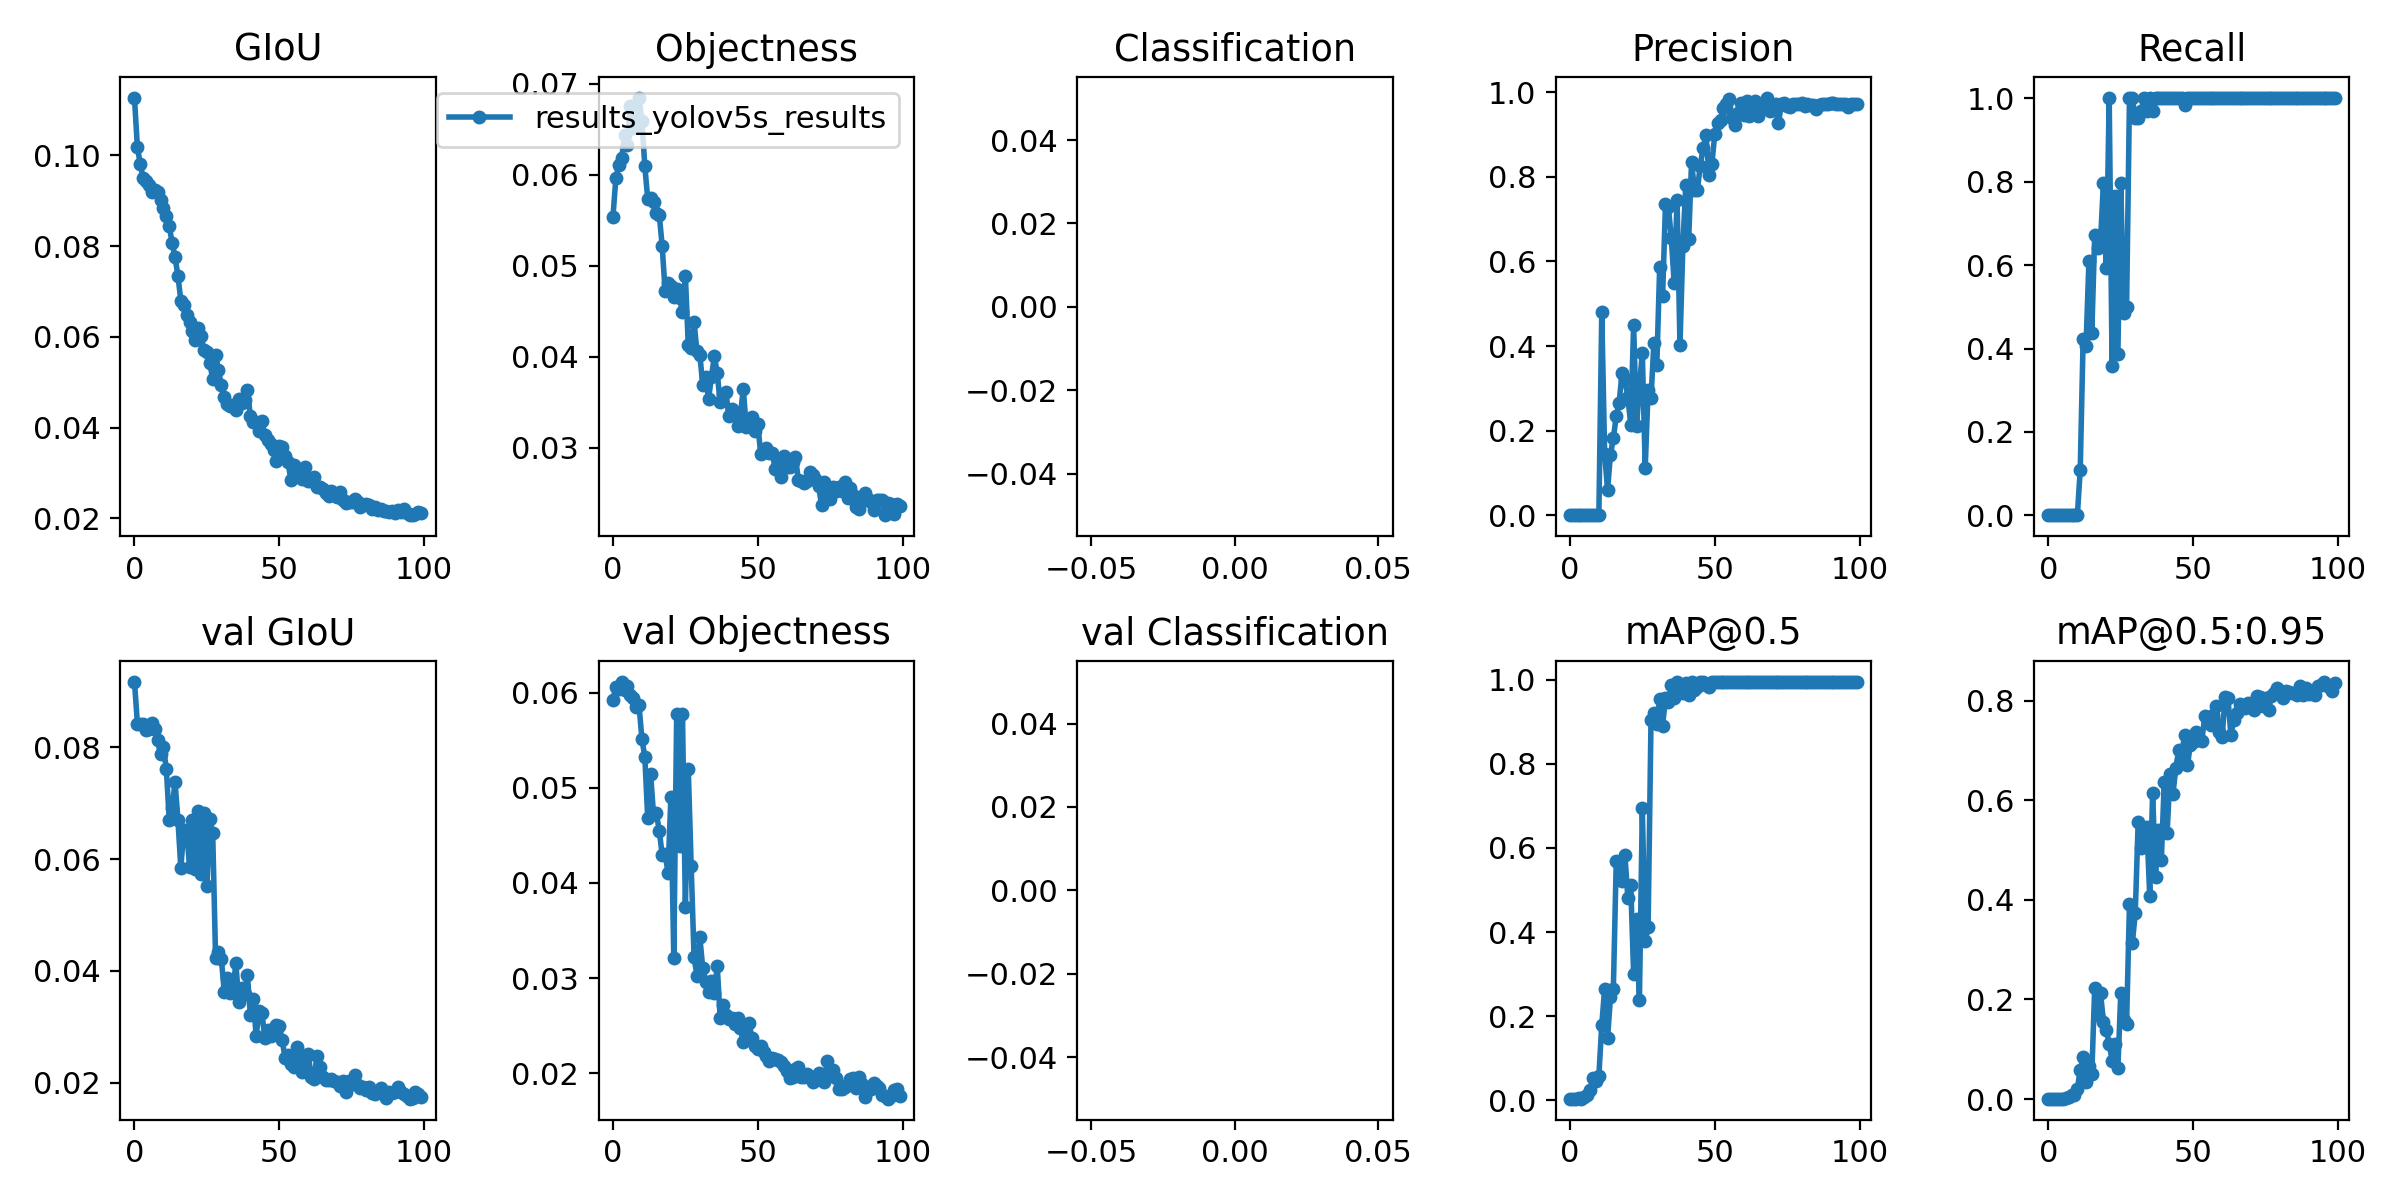

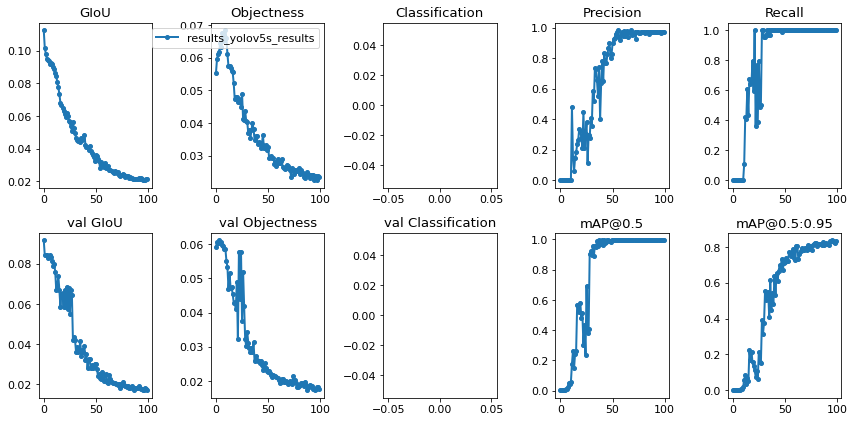

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.utils import plot_results; plot_results()  # plot results.txt as results.png
Image(filename='./results.png', width=1000)  # view results.png

### VisualisingTraining Data with Labels

GROUND TRUTH TRAINING DATA:


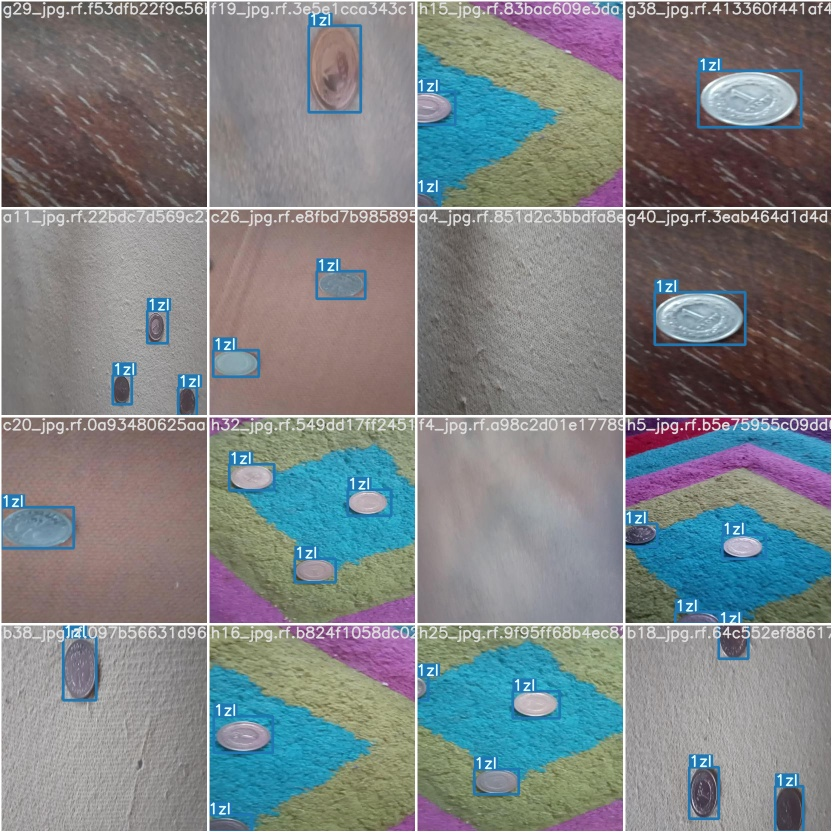

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='./test_batch0_gt.jpg', width=900)

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='./train_batch2.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


#Run Inference  With Trained Weights


In [ ]:
# trained weights are saved by default in our weights folder
%ls weights/

download_weights.sh  last_yolov5s_results.pt


In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
%cd /content/yolov5/
!python detect.py --weights weights/last_yolov5s_results.pt --img 416 --conf 0.4 --source ../test/images


/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='../test/images', view_img=False, weights='weights/last_yolov5s_results.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

image 1/18 ../test/images/b16_jpg.rf.87dce99596eb60e1c1e6a8b990908010.jpg: 416x416 1 1zls, Done. (0.008s)
image 2/18 ../test/images/b21_jpg.rf.16a6bfbd941e2ab662933960e8640185.jpg: 416x416 2 1zls, Done. (0.008s)
image 3/18 ../test/images/b27_jpg.rf.fd28f5a3915d698aa95acd43c0522584.jpg: 416x416 1 1zls, Done. (0.008s)
image 4/18 ../test/images/b29_jpg.rf.ed5dc5399d75018ee25fd49ccd5539ff.jpg: 416x416 1 1zls, Done. (0.008s)
image 5/18 ../test/images/b8_jpg.rf.cbd4cfc8ee814de980783247b5056ebc.jpg: 416x416 1 1zls, Done. (0.008s)
image 6/18 ../test/images/c30_jpg.rf.f1e3f290ebbe8611a44cb1b50c20ef6b.jpg: 416x416 1 1zls, Done. (0.008s)


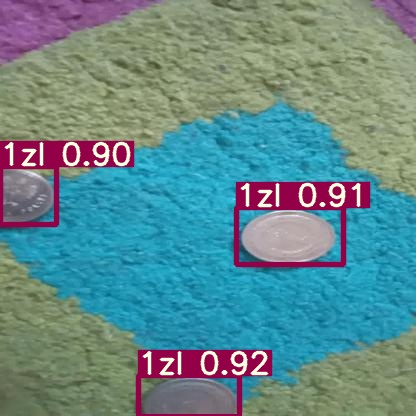

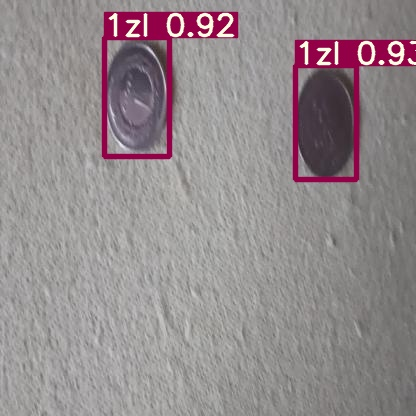

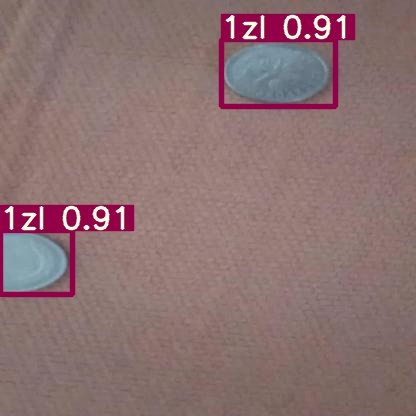

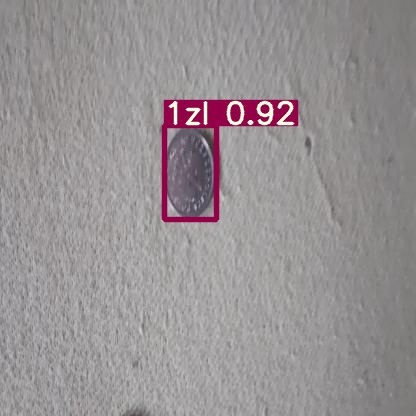

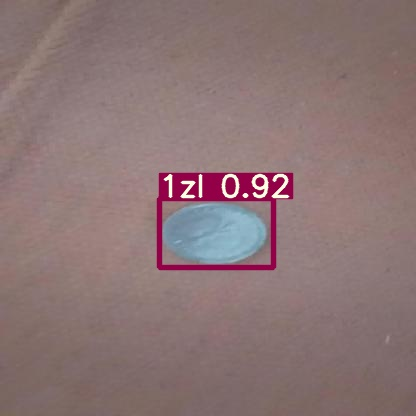

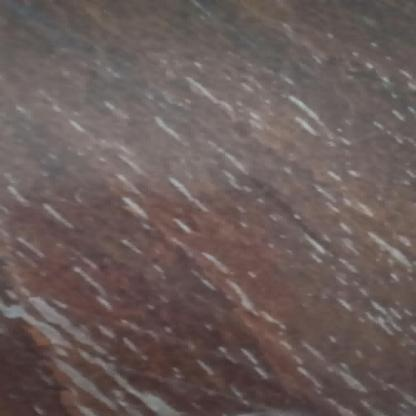

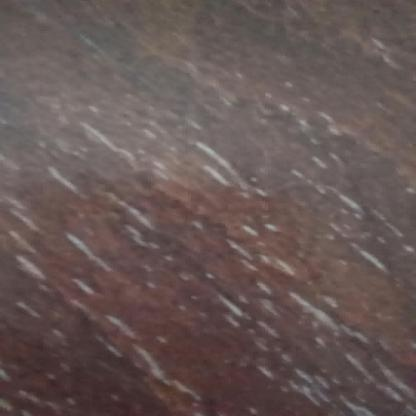

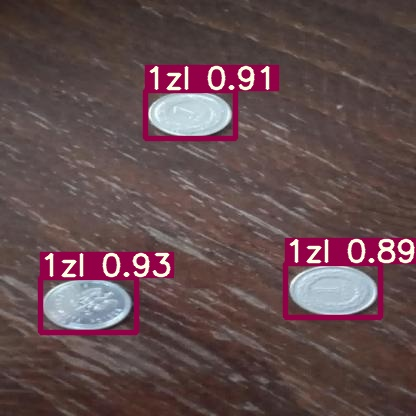

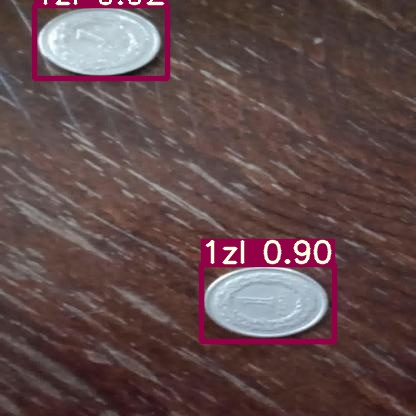

In [ ]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/inference/output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Save Trained Weights

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cp /content/yolov5/weights/last_yolov5s_results.pt /content/gdrive/My\ Drive

In [ ]:
!pwd

/content/yolov5


In [ ]:
!pip install onnx

     |████████████████████████████████| 7.4MB 2.7MB/s 


In [ ]:
#!cp models/onnx_export.py .
!python onnx_export.py --weights weights/last_yolov5s_results.pt --img 416 --batch 16


Namespace(batch_size=16, img_size=416, weights='weights/last_yolov5s_results.pt')
/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:176: UserWarning: ONNX export failed on slice because step!=1 is currently not supported not supported
  warnings.warn("ONNX export failed on " + op + " because " + msg + " not supported")
/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_helper.py:243: UserWarning: You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mode).
We recommend using opset 11 and above for models using this operator. 
  "" + str(_export_onnx_opset_version) + ". "
graph(%0 : Float(16, 3, 208, 416),


In [ ]:
#!pip uninstall onnx-tf
#!pip install --user https://github.com/onnx/onnx-tensorflow/archive/master.zip
!/root/.local/bin/onnx-tf convert -i weights/last_yolov5s_results.onnx -o weights/output.pb

2020-06-18 15:13:55.331435: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
/root/.local/lib/python3.6/site-packages/onnx_tf/common/__init__.py:96: UserWarning: onnx_tf.common.get_outputs_names is deprecated. It will be removed in future release. Use TensorflowGraph.get_outputs_names instead.
  warnings.warn(message)
2020-06-18 15:13:57,087 - onnx-tf - INFO - Start converting onnx pb to tf pb:
2020-06-18 15:13:57,168 - onnx-tf - INFO - Fail to get since_version of BitShift in domain `` with max_inclusive_version=9. Set to 1.
2020-06-18 15:13:57,169 - onnx-tf - INFO - Unknown op ConstantFill in domain `ai.onnx`.
2020-06-18 15:13:57,169 - onnx-tf - INFO - Fail to get since_version of ConvInteger in domain `` with max_inclusive_version=9. Set to 1.
2020-06-18 15:13:57,169 - onnx-tf - INFO - Fail to get since_version of CumSum in domain `` with max_inclusive_version=9. Set to 1.
2020-06-18 15:13:57,169 - onnx-tf - INFO -

In [ ]:
!pip uninstall onnx_tf
!pip install git+https://github.com/onnx/onnx-tensorflow

  Cloning https://github.com/onnx/onnx-tensorflow to /tmp/pip-req-build-foq3eoo4
  Running command git clone -q https://github.com/onnx/onnx-tensorflow /tmp/pip-req-build-foq3eoo4
  Created wheel for onnx-tf: filename=onnx_tf-1.5.0-cp36-none-any.whl size=174231 sha256=9a6faaf838f96db741ae11ae17fcea23165f9475a5d66c8a3aac5907e2eda884
  Stored in directory: /tmp/pip-ephem-wheel-cache-xmggbw6s/wheels/d8/21/6f/970248b488217d9a10f27a6ad79005da81cdb7aa0dded783ad
Successfully built onnx-tf


In [1]:
!pip install onnxruntime-tools

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 153kB 8.6MB/s 
     |████████████████████████████████| 7.4MB 8.4MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-6.0.0-cp36-none-any.whl size=19782 sha256=4a053414cdc6aaf8c6450265851aa256390341b5fe87a82ab533d6bb8988cca2
  Stored in directory: /root/.cache/pip/wheels/1c/f3/3c/ddcb384c30323d66d842b42f93b6cd2cbdfd1b317237042372
Successfully built py-cpuinfo


In [ ]:
import tensorflow as tf
import torch
import onnx
from onnx_tf.backend import prepare

model_onnx = onnx.load('weights/last_yolov5s_results.onnx')

tf_rep = prepare(model_onnx)

# Export model as .pb file
tf_rep.export_graph('weights/last_yolov5s_results.pb')

AttributeError: ignored